<a href="https://colab.research.google.com/github/Ivaldivi/DATA515-Image-Classification/blob/izzy%2Fcnn/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [28]:
!pip install mediapipe==0.10.21

import tensorflow as tf
import mediapipe as mp
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [27]:
##
# Left join of clean_images & full
clean_images = pd.read_csv("landmarks_washington_clean_images.csv")
full_images = pd.read_csv("landmarks_washington_full.csv")
clean_left = clean_images.merge(full_images, on="landmark_id", how="left")

# Get list of landmark labels- Unique landmark names
landmark_classes = clean_left["name"].unique()

# Image pre-processing (standardize image dimensions)
clean_left

,landmark_id,image_id,url,name,supercategory,location,latitude,longitude,category
0,262,1272ef793ebba7a2,https://upload.wikimedia.org/wikipedia/commons...,Comet Falls,waterfall,"Mount Rainier National Park,Lewis County,Washi...",46.7958,121.780,http://commons.wikimedia.org/wiki/Category:Com...
1,262,3f509df1d66997a0,https://upload.wikimedia.org/wikipedia/commons...,Comet Falls,waterfall,"Mount Rainier National Park,Lewis County,Washi...",46.7958,121.780,http://commons.wikimedia.org/wiki/Category:Com...
2,262,a263751cf3b9d364,https://upload.wikimedia.org/wikipedia/commons...,Comet Falls,waterfall,"Mount Rainier National Park,Lewis County,Washi...",46.7958,121.780,http://commons.wikimedia.org/wiki/Category:Com...
3,262,9981810cd64b2e5b,https://upload.wikimedia.org/wikipedia/commons...,Comet Falls,waterfall,"Mount Rainier National Park,Lewis County,Washi...",46.7958,121.780,http://commons.wikimedia.org/wiki/Category:Com...
4,262,172999b2cc578a66,https://upload.wikimedia.org/wikipedia/commons...,Comet Falls,waterfall,"Mount Rainier National Park,Lewis County,Washi...",46.7958,121.780,http://commons.wikimedia.org/wiki/Category:Com...
...,...,...,...,...,...,...,...,...,...
4921,203087,1ee045e5a3bc9568,https://upload.wikimedia.org/wikipedia/commons...,Jack Block Park,park,"Seattle,King County,Washington,Pacific Northwe...",47.5831,122.371,http://commons.wikimedia.org/wiki/Category:Jac...
4922,203087,adb2a9e25454e0d1,https://upload.wikimedia.org/wikipedia/commons...,Jack Block Park,park,"Seattle,King County,Washington,Pacific Northwe...",47.5831,122.371,http://commons.wikimedia.org/wiki/Category:Jac...
4923,203087,3d904df7f6c9f92a,https://upload.wikimedia.org/wikipedia/commons...,Jack Block Park,park,"Seattle,King County,Washington,Pacific Northwe...",47.5831,122.371,http://commons.wikimedia.org/wiki/Category:Jac...
4924,203087,3895947116add663,https://upload.wikimedia.org/wikipedia/commons...,Jack Block Park,park,"Seattle,King County,Washington,Pacific Northwe...",47.5831,122.371,http://commons.wikimedia.org/wiki/Category:Jac...


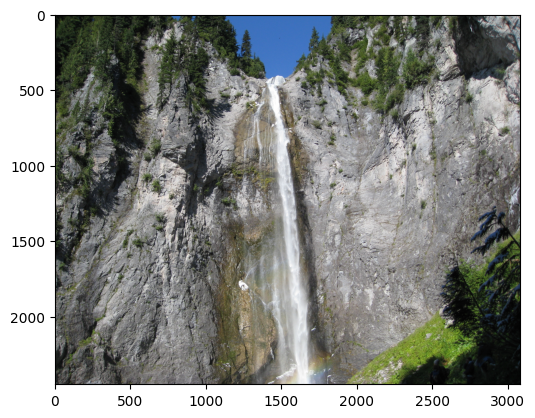

In [36]:
#

url1 = clean_left["url"].unique()[0]

image = io.imread(url1)
plt.imshow(image)


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


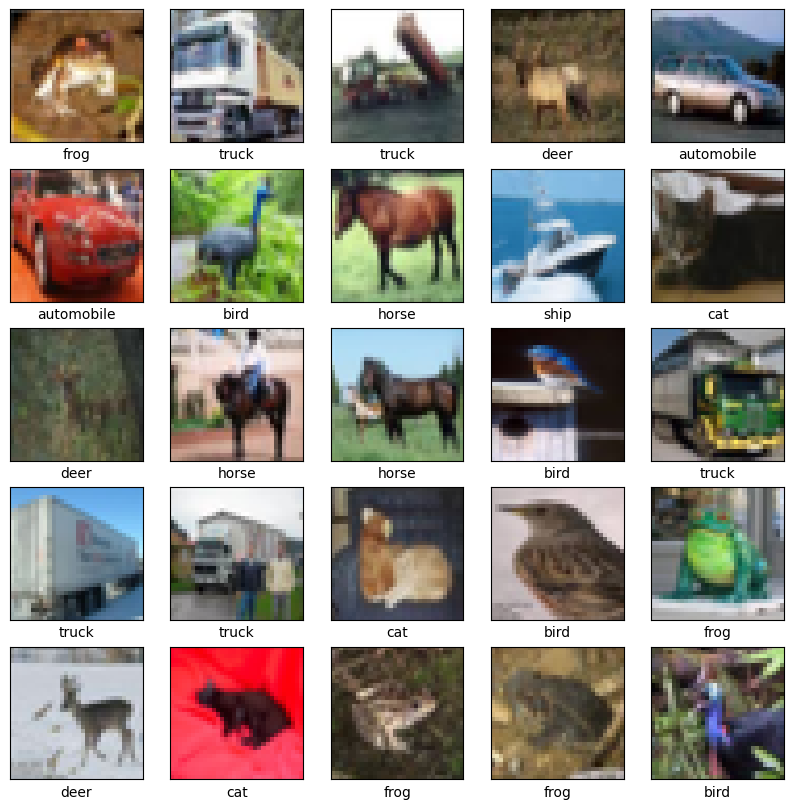

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's display the architecture of your model so far:

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3412 - loss: 1.7596 - val_accuracy: 0.5350 - val_loss: 1.3018
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5714 - loss: 1.2029 - val_accuracy: 0.6084 - val_loss: 1.1032
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6328 - loss: 1.0396 - val_accuracy: 0.6051 - val_loss: 1.1709
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6734 - loss: 0.9333 - val_accuracy: 0.6633 - val_loss: 0.9577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6943 - loss: 0.8716 - val_accuracy: 0.6684 - val_loss: 0.9564
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7170 - loss: 0.8176 - val_accuracy: 0.6993 - val_loss: 0.8675
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7370 - loss: 0.7550 - val_accuracy: 0.6888 - val_loss: 0.8881
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7510 - loss: 0.705

### Evaluate the model

In [14]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')
history.history
# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

{'accuracy': [0.4401400089263916,
  0.590499997138977,
  0.6419000029563904,
  0.673799991607666,
  0.6976400017738342,
  0.7178999781608582,
  0.7345399856567383,
  0.7460200190544128,
  0.7589200139045715,
  0.7720000147819519],
 'loss': [1.5256437063217163,
  1.154672622680664,
  1.01727294921875,
  0.9314143657684326,
  0.8621127605438232,
  0.8102231025695801,
  0.7638998627662659,
  0.7221229672431946,
  0.6856389045715332,
  0.6473313570022583],
 'val_accuracy': [0.5350000262260437,
  0.6083999872207642,
  0.6050999760627747,
  0.6632999777793884,
  0.66839998960495,
  0.6992999911308289,
  0.6887999773025513,
  0.7093999981880188,
  0.7091000080108643,
  0.7123000025749207],
 'val_loss': [1.3017704486846924,
  1.1032370328903198,
  1.1709434986114502,
  0.9577402472496033,
  0.9563881754875183,
  0.8674865365028381,
  0.8880731463432312,
  0.856728732585907,
  0.8621482253074646,
  0.8504071235656738]}

In [ ]:
print(test_acc)

0.7074999809265137


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.